<a href="https://colab.research.google.com/github/lavanyanandikonda/Titanic-Survival-Prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/.kaggle"

In [3]:
!kaggle datasets download -d shuofxz/titanic-machine-learning-from-disaster

Dataset URL: https://www.kaggle.com/datasets/shuofxz/titanic-machine-learning-from-disaster
License(s): DbCL-1.0
  0% 0.00/33.1k [00:00<?, ?B/s]
100% 33.1k/33.1k [00:00<00:00, 48.6MB/s]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import zipfile
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/titanic.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [7]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
train.shape

(891, 12)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
train=train.drop(columns='Cabin',axis=1)

In [12]:
train['Age'].fillna(train['Age'].mean(),inplace=True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [14]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [15]:
print(train['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [16]:
print(train['Embarked'].mode()[0])

S


In [17]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [18]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [20]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

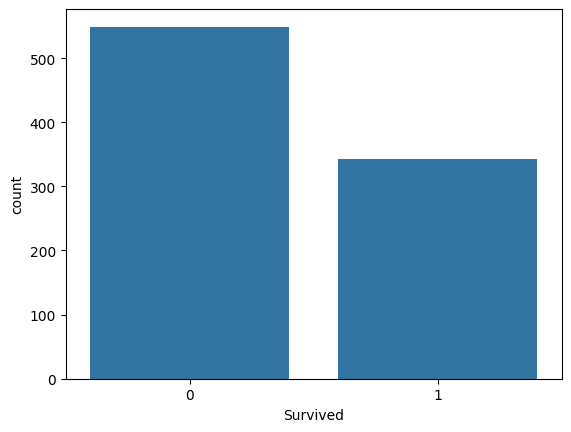

In [21]:
sns.countplot(x='Survived',data=train)

In [22]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

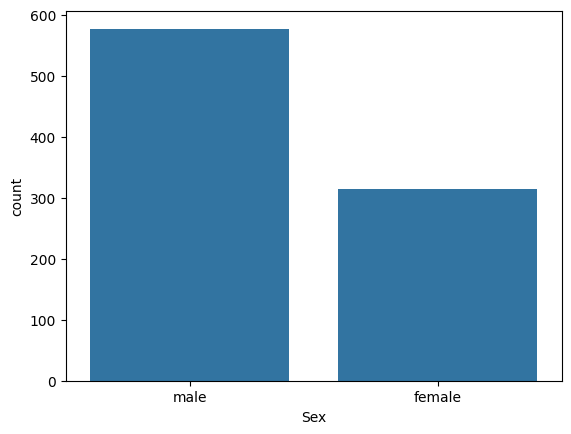

In [23]:
sns.countplot(x='Sex',data=train)

<Axes: xlabel='Sex', ylabel='count'>

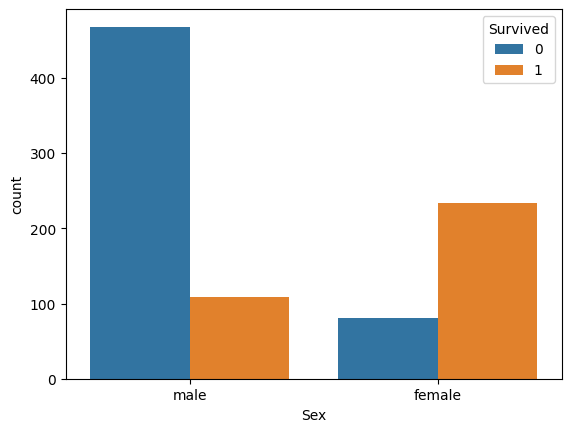

In [24]:
sns.countplot(x='Sex',hue='Survived',data=train)

<Axes: xlabel='Pclass', ylabel='count'>

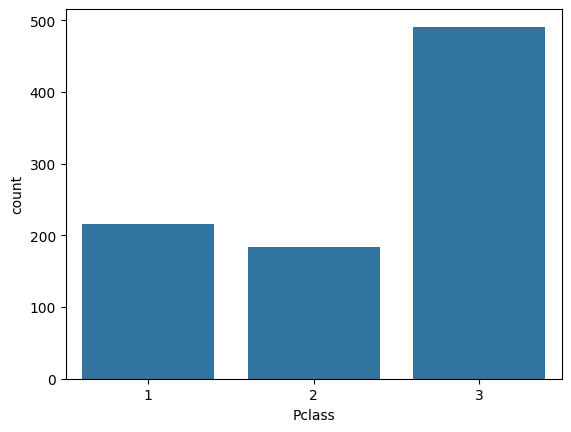

In [25]:
sns.countplot(x='Pclass',data=train)

<Axes: xlabel='Pclass', ylabel='count'>

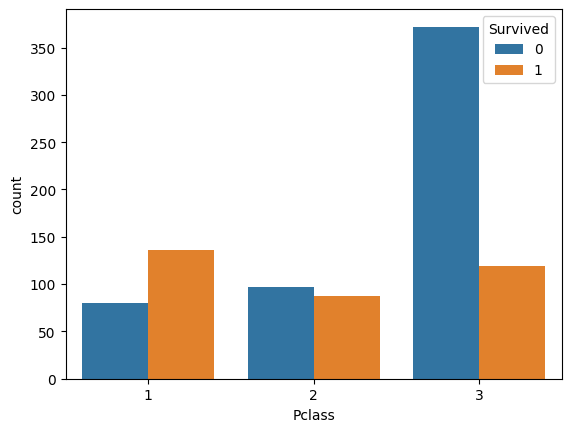

In [26]:
sns.countplot(x='Pclass',hue='Survived',data=train)

In [27]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [28]:
train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [29]:
train.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [30]:
x=train.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y=train['Survived']

In [31]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [32]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [34]:
print(x.shape,x_train.shape,x_test.shape)

(891, 7) (712, 7) (179, 7)


In [35]:
model=LogisticRegression()

In [36]:
model.fit(x_train,y_train)

LogisticRegression()

In [37]:
x_train_prediction=model.predict(x_train)

In [38]:
print(x_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [39]:
accuracy=accuracy_score(y_train,x_train_prediction)
print(accuracy)

0.8075842696629213


In [40]:
import joblib
joblib.dump(model,'logistic_regression.pkl')

['logistic_regression.pkl']

In [41]:
!pip install pyngrok

In [44]:
import subprocess
from pyngrok import ngrok
import os
ngrok.set_auth_token("2jyFLAYbc6iCVDg4eKyGILVmEgM_2XBqBQTsf8SjvSbUUtTbv")
os.system("nohup python -m flask run --no-reload &")
proc=subprocess.Popen(["ngrok","http","5000"])
url=ngrok.connect(addr="5000",proto="http")
print(url)

NgrokTunnel: "https://f906-34-82-29-162.ngrok-free.app" -> "http://localhost:5000"


In [ ]:
from flask import Flask, request, jsonify
import joblib
from pyngrok import ngrok
from IPython.display import display, HTML

# Load the model
model = joblib.load('logistic_regression.pkl')

# Create the Flask app
app = Flask(__name__)

@app.route('/')
def home():
    html_form = """
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Titanic Survival Prediction</title>
        <style>
            body {
                background-image: url('https://example.com/your-background-image.jpg');
                background-size: cover;
                background-position: center;
                height: 100vh;
                display: flex;
                justify-content: center;
                align-items: center;
                margin: 0;
                font-family: Arial, sans-serif;
            }
            .form-container {
                background: rgba(255, 255, 255, 0.8);
                padding: 20px;
                border-radius: 10px;
                box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
            }
            form {
                display: flex;
                flex-direction: column;
            }
            label, input {
                margin: 10px 0;
            }
        </style>
    </head>
    <body>
        <div class="form-container">
            <h2>Titanic Survival Prediction</h2>
            <form id="predictionForm" method="POST">
                <label for="Pclass">Pclass:</label>
                <input type="number" id="Pclass" name="Pclass" required><br>
                <label for="sex">Sex (0 for male, 1 for female):</label>
                <input type="number" id="sex" name="sex" required><br>
                <label for="Age">Age:</label>
                <input type="number" id="Age" name="Age" required><br>
                <label for="SibSp">SibSp:</label>
                <input type="number" id="SibSp" name="SibSp" required><br>
                <label for="Parch">Parch:</label>
                <input type="number" id="Parch" name="Parch" required><br>
                <label for="Fare">Fare:</label>
                <input type="number" id="Fare" name="Fare" required><br>
                <label for="Embarked">Embarked (0 for S, 1 for C, 2 for Q):</label>
                <input type="number" id="Embarked" name="Embarked" required><br>
                <button type="button" onclick="predictSurvival()">Predict</button>
            </form>
            <p id="predictionResult"></p>
        </div>
        <script>
        function predictSurvival() {
            var xhr = new XMLHttpRequest();
            var url = '/predict';
            var data = new FormData(document.getElementById('predictionForm'));
            xhr.open('POST', url, true);
            xhr.onreadystatechange = function() {
                if (xhr.readyState === 4 && xhr.status === 200) {
                    var response = JSON.parse(xhr.responseText);
                    document.getElementById('predictionResult').innerHTML = "Survival Prediction: " + response.prediction;
                }
            };
            xhr.send(data);
        }
        </script>
    </body>
    </html>
    """
    return html_form

@app.route('/predict', methods=['POST'])
def predict():
    pclass = request.form.get('Pclass')
    sex = request.form.get('sex')
    age = request.form.get('Age')
    sibsp = request.form.get('SibSp')
    parch = request.form.get('Parch')
    fare = request.form.get('Fare')
    embarked = request.form.get('Embarked')

    pclass = int(pclass)
    sex = int(sex)
    age = float(age)
    sibsp = int(sibsp)
    parch = int(parch)
    fare = float(fare)
    embarked = int(embarked)

    features = [[pclass, sex, age, sibsp, parch, fare, embarked]]
    prediction = model.predict(features)
    return jsonify({'prediction': int(prediction[0])})

def run_flask_app():
    app.run(host="127.0.0.1", port=5000, debug=True, use_reloader=False)

url = ngrok.connect(addr="5000")
print(url)
display(HTML(f"<h2>Open this link in your browser to access the application:</h2><p>{url}</p>"))

try:
    run_flask_app()
except KeyboardInterrupt:
    ngrok.kill()


NgrokTunnel: "https://8f5f-34-82-29-162.ngrok-free.app" -> "http://localhost:5000"


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [06/Aug/2024 06:57:47] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Aug/2024 06:57:49] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [06/Aug/2024 06:58:57] "POST /predict HTTP/1.1" 200 -
